#***SHALLOW LEARNING***#

HAY DOS GRANDES GRUPOS; SUPERVISED O UNSUPERVISED.

##1.- **SUPERVISED LEARNING.**
NECESITAN DATOS ETIQUETADOS. SI POR EJEMPLO ESTAMOS CLASIFICANDO IMAGENES
NECESITAMOS EJEMPLOS DE LAS IMAGENES Y LA CLASE QUE TENEMOS QUE DARLE A CADA
IMAGEN, ESTO LLEVA TIEMPO, ES DIFICIL, NECESITAS GENTE QUE HAGA ESO

###1.1 REGRESION.
####1.1.1. REGRESION LINEAL (PROYECTO 1)

###1.2 CLASIFICACION.
####1.2.1. REGRESION LOGISTICA (PROYECTO 2)
####1.2.2 KNN (PROYECTO 3)
####1.2.3. RANDOM FOREST (PROYECTO 4)

##2.- **UNSUPERVISED LEARNING.**
NO NECESITA DATOS ETIQUETADOS, SOLO CON DATOS NO ETIQUETADOS DE FORMA NO SUPERVISADA, ALGO APRENDEN TAMBIEN LOS ALGORITMOS.

###2.1 CLUSTERING. AGRUPAR DATOS EN DIFERENTES GRUPOS QUE PUEDAN SERVIR PARA RESOLVER UNA TAREA
####2.1.1. K-MEANS (PROYECTO 5)

#Proyecto 1: Regresion lineal.#

La regresión se utiliza para predecir un valor continuo en función de uno o más
valores de entrada. Un ejemplo de esto sería predecir el precio de una casa basado en características como su ubicación, el número de habitaciones, el tamaño del lote, etc. Los algoritmos de regresión intentan trazar una línea (o una superficie, en el caso de múltiples variables de entrada) que modela la relación entre las entradas y la salida. Los modelos de regresión más comunes incluyen la regresión lineal.

In [2]:
# Importamos las librerías

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -O country_stats.csv https://raw.githubusercontent.com/CharlieScot/Inteligencia-Artificial/main/MODULO_4/country_stats.csv

--2024-01-02 13:44:04--  https://raw.githubusercontent.com/CharlieScot/Inteligencia-Artificial/main/MODULO_4/country_stats.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 715 [text/plain]
Saving to: ‘country_stats.csv’

country_stats.csv   100%[===================>]     715  --.-KB/s    in 0s      

2024-01-02 13:44:04 (38.0 MB/s) - ‘country_stats.csv’ saved [715/715]



In [ ]:
# Creamos Dataframe com Pandas leyendo del archivo csv

df=pd.read_csv('country_stats.csv')

df

,Pais,PIB per capita,Indice de felicidad
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.893,4.9
3,Poland,12495.333,5.8
4,Slovak Republic,15991.736,6.1
5,Estonia,17288.083,5.6
6,Greece,18064.288,4.8
7,Portugal,19121.592,5.1
8,Slovenia,20732.482,5.7
9,Spain,25864.721,6.5


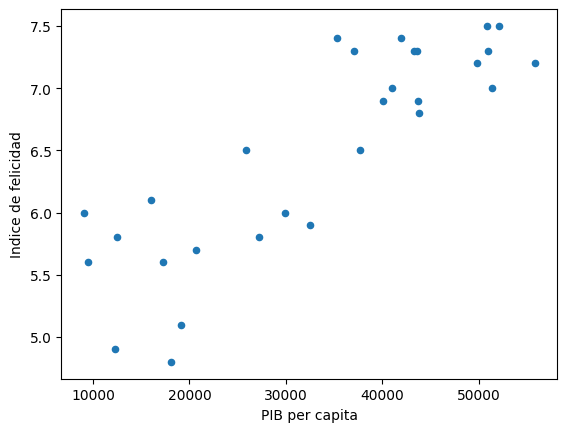

In [ ]:
# Visualización de la data usando la librería Matplotlib

df.plot(kind= 'scatter', x='PIB per capita', y='Indice de felicidad')

plt.show()

In [ ]:
# Parece que se ve una tendencia que indica que cuanto mayor es el PIB de un pais
# mas satisfecha esta la gente
# vamos a desarrollar un modelo que en base a estos datos nos permita saber para
# cualquier pais su nivel de satisfaccion, es una tarea de regresion
# vamos a usar un algoritmo muy simple que se basa en una regresion lineal, es
# una recta
# y= m*x + b

# y    variable que queremos predecir
# m
# x     PIB
# b

# tenemos que entrenar a este modelo para darle unos valores a los parametros
# que son la m y la b, que se ajusten a la tendencia que vemos en la grafica

# usamos la libreria de Scikit Learn

La ecuación general de una regresión lineal simple es:

$y = mx + b$

donde:

+   $y$ es la variable dependiente,
+   $x$ es la variable independiente,
+   $m$ es la pendiente de la línea (coeficiente de la variable independiente),
+   $b$ es el intercepto.

En términos prácticos, el intercepto indica el valor de $y$ cuando $x$ es igual a cero.

El intercepto en una regresión lineal es el valor en el eje vertical (eje y) donde la línea de regresión cruza o intercepta dicho eje.

In [ ]:
# Creación del modelo de Regresion Lineal usando la librería Sklearn y numpy

from sklearn import linear_model
import numpy as np

lin1 = linear_model.LinearRegression()

# A continuación, np.c_ se utiliza para concatenar las columnas del DataFrame
# df["PIB per capita"] y df["Indice de felicidad"] a lo largo del segundo eje.
# Esto es necesario porque lin1.fit espera que Xsample y ysample sean arreglos
# bidimensionales, y np.c_ se utiliza para realizar esta concatenación de
# manera conveniente.

Xsample = np.c_[df["PIB per capita"]]
ysample = np.c_[df["Indice de felicidad"]]
lin1.fit(Xsample, ysample)

# Se obtienen los coeficientes de la ecuación de regresión lineal. b representa
# la ordenada al origen (intercepto), y m representa la pendiente de la línea.

b, m= lin1.intercept_[0], lin1.coef_[0][0]

# En el caso de una regresión simple, el uso del índice 0 en la función
# intercept_ es simplemente una convención para obtener el único valor de
# intercepto presente en el arreglo.

b, m

# Esto significa que el modelo predice el Índice de felicidad en función del PIB
# per cápita con estas constantes resultantes. El intercepto representa el valor
# estimado del Índice de felicidad cuando el PIB per cápita es cero, y el
# coeficiente indica el cambio en el Índice de felicidad por cada unidad de
# aumento en el PIB per cápita.

(4.8530528073310295, 4.911544598433898e-05)

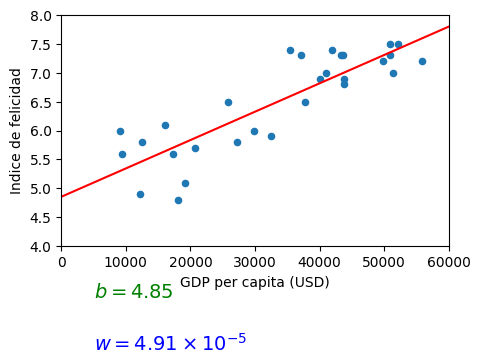

In [ ]:
df.plot(kind='scatter', x="PIB per capita", y='Indice de felicidad', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 4, 8])
X=np.linspace(0, 60000, 1000)
plt.plot(X, b + m*X, "r")
plt.text(5000, 3.1, r"$b = 4.85$", fontsize=14, color="g")
plt.text(5000, 2.2, r"$w = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

In [ ]:
#vamos a usar nuestro algoritmo para predecir el nivel de satisfaccion de
#cualquier pais del que sepamos su PIB

cyprus_pib_per_capita = 22587
cyprus_predicted_indice_felicidad = lin1.predict([[cyprus_pib_per_capita]])[0][0]
cyprus_predicted_indice_felicidad

5.962423385779294

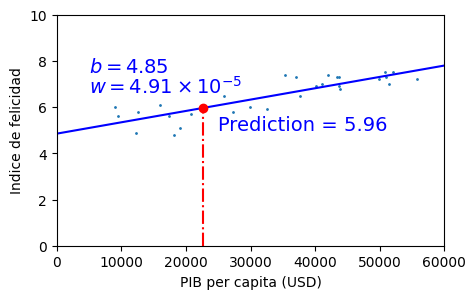

In [ ]:
df.plot(kind='scatter', x="PIB per capita", y='Indice de felicidad', figsize=(5,3), s=1)
plt.xlabel("PIB per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, b + m*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$b = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$w = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_pib_per_capita, cyprus_pib_per_capita], [0, cyprus_predicted_indice_felicidad], "r-.")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_pib_per_capita, cyprus_predicted_indice_felicidad, "ro")
plt.show()

In [ ]:
#Queremos predecir el precio de una casa basado en varias caracteristicas como
#ubicacion, metros cuadrados de parcela, numero de habitaciones, piscina, etc

#Ya vimos la formula tipica de regresion lineal
# Y= Wo + W1X1 + W2X2 + W3X3....
# Donde Y es el precio de la casa a predecir
# X son las caracteristicas(habitaciones, metros cuadrados, etc)
# W son los pesos(weights) o parametros del modelo

# Una metrica comun sobre la calidad de nuestro modelo es el SME (squared mean
# error), valores predichos menos el valor reales lo elevamos al cuadrado y los
#sumamos para todas las muestras que tengamos, dividimos por el numero total de
#muestras

import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, -3, 10])
plt.show()


#Y seria el precio de la casa
#X1 seria la unica variable o caracteristica de la casa (metros cuadrados, por
#ejemplo)

In [ ]:
#vamos a entrenar un modelo de regresion lineal con sklearn
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

#En el coef tenemos todos los pesos (w) que se multiplican por las
#caracteristicas (X), en este caso solo hay el W1 porque solo hay una variable
#o caracteristica (X1)
#En el intercept tenemos el Wo o bias

In [ ]:
#llamamos a la funcion predict con datos nuevos para sacar prediccione
#en este caso vamos a sacar predicciones para los puntos 0 y 2

X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, -3, 10])
plt.show()

In [ ]:
#la linea intenta ajustarse lo maximo posible a los datos e intenta minimizar
#el SME

In [ ]:
#que sucede si los datos NO siguen una tendencia lineal tan sencilla como
#la de arriba

import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = np.array([[-3], [3]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
#en SKLEARN podemos usar modelos de regresion polinomial para que se ajuste
#mas a la realidad de estos nuevos datos, usariamos curvas en vez de rectas

#lo que vamos a hacer es procesar nuestros datos para transformarlos en un
#espacio de representacion con mas variables x1 x2 x3 etc. de forma que en
#este nuevo espacio transformado nuestros datos sigan una tendencia lineal
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]  #compara la primera fila de la matriz original X y la
#primera fila de la matriz transformada

#la funcion transform cambia una variable a dos variables como vemos abajo
#estas dos variables representan lo mismo que la variable unica pero en
#otro espacio


In [ ]:
#si ahora entrenamos el modelo usando los nuevos datos procesados veamos
#que tenemos otro modelo que nos da mejores resultados

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
#como se yo el grado del polinomio?, con tantas variables que afectan al precio
#de la casa, prueba un monton de valores y quedate con el que mejor funcione
#hiperoptimizacion de parametroS
#probaremos varios grados diferentes 1, 2, 40 o mas
#para cada uno de ellos calculamos su metrica , su SME y veremos cual funciona
#mejor
#cuando usamos el grado 1 tenemos un problema de underfitting (poco ajustado)
#cuando usamos el grado 40 tenemos un problema de overfitting (demasiado
#ajustado)
#Para evaluar estos modelos lo tenemos que hacer con datos nuevos, problamente
#el modelo grado 2 nos de mejor resultados, pero si no evaluaramos con datos
#nuevos el grado 40 nos daria mejores resultado (no GENERALIZA bien a los datos
#nuevos)


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 40), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Proyecto 2: Clasificación - Regresión Logística.

La clasificación es un tipo de problema en el que el objetivo es predecir una
categoría o clase a partir de uno o más valores de entrada. Un ejemplo común es el filtro de spam de un proveedor de correo electrónico, que clasifica los correos electrónicos como "spam" o "no spam" basándose en una serie de características del correo electrónico. Algunos de los algoritmos más comunes para los problemas de clasificación incluyen las máquinas de vectores de soporte, los árboles de decisión y las redes neuronales.

In [ ]:
# La regresión logística en scikit-learn se considera un modelo de clasificación.
# Aunque el término "regresión" está presente en su nombre, la regresión logística
# se utiliza principalmente para problemas de clasificación binaria o multiclase.

# La regresión logística estima la probabilidad de que una instancia pertenezca a
# una clase específica utilizando una función logística o sigmoide.
# A partir de esta probabilidad estimada, se toma una decisión de clasificación
# asignando la instancia a la clase con la probabilidad más alta.

# En el caso del dataset Iris en scikit-learn, la regresión logística se puede
# utilizar para clasificar las flores en diferentes especies utilizando las
# características disponibles en el conjunto de datos.

# El dataset Iris contiene mediciones de características de tres especies de
# flores: setosa, versicolor y virginica. Cada muestra del dataset tiene cuatro
# características: longitud y ancho del sépalo, y longitud y ancho del pétalo.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#cargamos el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target



In [ ]:
# dividimos los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#creamos una instancia del modelo de regresion logistica y entrenarlo

logreg=LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#realizamos prediccion en el conjunto de prueba

y_pred=logreg.predict(X_test)

La evaluación de un modelo de machine learning es un paso esencial para entender
cómo de bien está funcionando. Dependiendo de si tu modelo es de clasificación,
regresión o algún otro tipo de modelo, hay diferentes métricas que puedes usar.



*   ***Precisión (Accuracy)***: Es la proporción de predicciones correctas sobre
el total de predicciones. Es una métrica útil cuando las clases están
bien balanceadas.
*   ***Recall (Sensitivity o True Positive Rate)***: Es la proporción de verdaderos
positivos que se identificaron correctamente. Es útil en situaciones
donde los falsos negativos son más preocupantes que los falsos
positivos.
*   ***Precision***: Es la proporción de verdaderos positivos entre todas las
predicciones positivas. Es útil en situaciones donde los falsos
positivos son más preocupantes que los falsos negativos.
*   ***F1 Score***: Es la media armónica de Precision y Recall. Intenta equilibrar
ambas métricas y es más útil que la precisión cuando tienes una
distribución de clases desequilibrada.



Una matriz de confusión es una tabla que se utiliza para evaluar el rendimiento de un modelo de clasificación en problemas de aprendizaje supervisado. Es especialmente útil cuando se trata de problemas de clasificación binaria, aunque también se puede extender a problemas de clasificación multiclase.

La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas realizadas por un modelo en cada clase. La estructura básica de la matriz de confusión es la siguiente:

**Verdaderos Positivos (TP) ⇒
Falsos Negativos (FN) ⇒
Falsos Positivos (FP) ⇒
Verdaderos Negativos (TN)**


*   ***Verdaderos Positivos (TP)***: Son las instancias que el modelo ha clasificado correctamente como positivas.
*   ***Falsos Negativos (FN)***: Son las instancias que el modelo ha clasificado incorrectamente como negativas cuando son positivas.
*   ***Falsos Positivos (FP)***: Son las instancias que el modelo ha clasificado incorrectamente como positivas cuando son negativas.
*   ***Verdaderos Negativos (TN)***: Son las instancias que el modelo ha clasificado correctamente como negativas.


In [ ]:
#evaluamos el rendimiento del modelo mediante alguna metrica como
#por ejemplo la precision (accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
# Creamos la matriz de confusión.

matriz_confusion=confusion_matrix(y_test, y_pred)
print(matriz_confusion)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


En scikit-learn, el método ***score*** de un modelo de regresión logística se utiliza para calcular la precisión del modelo en un conjunto de datos dado. Este método está disponible en los estimadores de clasificación, incluida la regresión logística.

La precisión se define como la fracción de muestras correctamente clasificadas sobre el total de muestras. Para modelos de clasificación, el método ***score*** devuelve la precisión por defecto.

In [ ]:
logreg.score(X_test, y_test)

1.0

# Proyecto 3: Clasificación - K Nearest Neighbors.

In [3]:
# KNN es un algoritmo de aprendizaje supervisado usado tanto para problemas de
# clasificación cuando las etiquetas son categóricas como para problemas de
# regresion cuando las etiquetas son numéricas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# cargar el conjunto de datos de ejemplo "Iris"

iris=load_iris()
X=iris.data     # caracteristicas
y=iris.target   # etiquetas

# Dividir el conjunto de datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del clasificador K-NN con K=3, los 3 vecinos mas cercanos
knn=KNeighborsClassifier(n_neighbors=3)

# Entrenar el clasificador usando los datos de entrenamiento

knn.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba

y_pred=knn.predict(X_test)

# Calcular la precision de las predicciones
accuracy=accuracy_score(y_test, y_pred)

print('Precision:', accuracy)



Precision: 1.0


In [4]:
# Clasificación:
# Identificar a qué categoría pertenece un objeto.
# Aplicación: Detección de spam. ¿Es spam o no? ¿Es un buen vino o no?

# Regresión:
# Predecir un atributo asociado con un objeto.
# Aplicación: predicción de precios de acciones, pronóstico del tiempo.

# Agrupación:
# Agrupación automática de objetos similares en conjuntos.
# Aplicación: Segmentación de clientes, si a estos clientes les gusta esto, tal vez
# les gusta eso.

# Selección de modelo:
# Comparar, validar y elegir parámetros y modelos.
# Aplicación: mejorar la precisión del modelo mediante el ajuste de parámetros.

# Reducción de dimensionalidad:
# Reducir el número de variables aleatorias a considerar.
# Aplicación: Para aumentar la eficiencia del modelo.

# Preprocesamiento:
# Extracción y normalización de características.
# Aplicación: Transformar datos de entrada, como texto, para usarlos con la máquina.

# Algoritmos de aprendizaje.

In [ ]:
#Modelos más usados;

# Linear model
# SVM classifier
# Nearest neighbours KNN
# Decision trees
# Neural networks
# Forest

In [5]:
# Importando los paquetes necesarios.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Importamos SGDClassifier de sklearn.linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
# Mejor para que no falle en el google colab!

In [6]:
!wget -O winequality-red.csv https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRR7DZWHDPT36RAU7GZLIPLCQ

--2024-01-03 12:38:07--  https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRR7DZWHDPT36RAU7GZLIPLCQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.02s   

2024-01-03 12:38:08 (4.78 MB/s) - ‘winequality-red.csv’ saved [100951/100951]



In [7]:
wine=pd.read_csv('winequality-red.csv', sep=',')

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# Preprocesamiento de datos.

bins= (2, 6.5, 8)
group_names= ['bad', 'good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [12]:
# Now lets assign a labels to our quality variable
# Asignamos etiquetas a nuestra variable calidad(label_quality).

label_quality = LabelEncoder()

In [13]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

# Malos se convierten en O y buenos en 1

In [14]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [15]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<Axes: ylabel='count'>

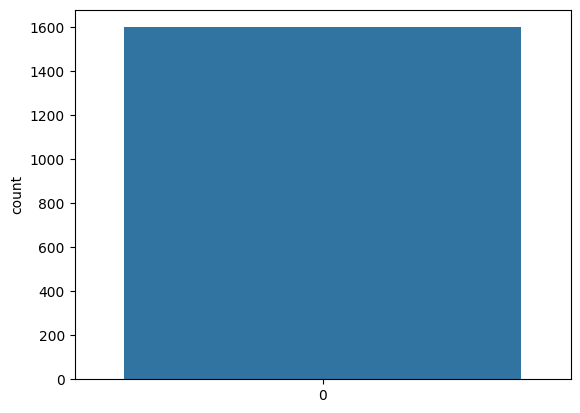

In [16]:
sns.countplot(wine['quality'])

In [17]:
# Ahora separamos el conjunto de datos como variable de respuesta y variables de
# características.

X = wine.drop('quality', axis = 1)
y = wine['quality']

In [18]:
# Entrenar y probar la división de datos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# Aplicamos el escalado standard para obtener los datos optimizados.
# La mayoria de los modelos necesitan scaling, los valores de nuestra base de
# datos son muy grandes comparados con otros y eso puede hacer que el modelo
# se concentre demasiado en los valores grandes.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [20]:
#ahora los valores estan menos dispersos y oscilan entre -2 y 4 mas o menos.

X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

# Proyecto 4: Clasificación - Random Forest.

In [1]:
# Cuantos arboles necesitas en el bosque (200)

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

NameError: ignored

In [ ]:
pred_rfc[:20]

In [ ]:
X_test[:20]

In [ ]:
# Veamos el desmpeño de nuetro modelo.

print(classification_report(y_test, pred_rfc))

In [ ]:
# Matriz de confusión para la clasificación aleatoria de bosques.

# Vemos que el modelo es bueno prediciendo vino malo (263,10) pero el modelo es
# malo prediciendo vino bueno (32, 15).

print(confusion_matrix(y_test, pred_rfc))

In [ ]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)

cm

In [ ]:
wine.head(10)

In [ ]:
# Probando un ejemplo.

Xnew = [[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]]
ynew = rfc.predict(Xnew)

In [ ]:
print('The quality of wine with given parameters is:')
print(ynew)

# Proyecto 5: Clusterización.

IMPORTAR LIBRERIAS Y MODELO

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

GENERAR DATOS FICTICIOS CON NUMPY

In [22]:
np.random.seed(42)

Grupo 1: Jovenes que gastan poco

In [23]:
edad_grupo1=np.random.normal(25, 5, 100)
gasto_grupo1=np.random.normal(200, 30, 100)

Grupo 2: Edad media que gasto medio

In [24]:
edad_grupo2=np.random.normal(45, 5, 100)
gasto_grupo2=np.random.normal(300, 50, 100)

Grupo3: Mayores que gastan mucho

In [25]:
edad_grupo3=np.random.normal(65, 8, 100)
gasto_grupo3=np.random.normal(500, 50, 100)

In [26]:
edad=np.concatenate([edad_grupo1, edad_grupo2, edad_grupo3])
gasto=np.concatenate([gasto_grupo1, gasto_grupo2, gasto_grupo3])

X=np.array(list(zip(edad, gasto)))

Aplicar KMeans

In [27]:
kmeans=KMeans(n_clusters=3)
kmeans.fit((X))
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Graficar

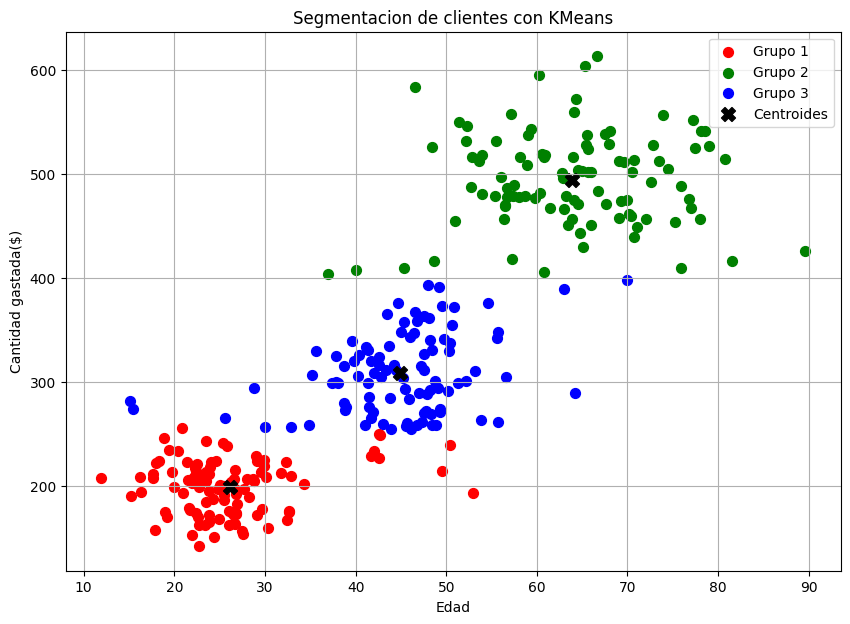

In [28]:
plt.figure(figsize=(10, 7))
colors=['r', 'g', 'b']
for i in range (3):
  plt.scatter(X[labels==i][:, 0], X[labels==i][:, 1], c=colors[i], label=f"Grupo {i+1}", s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroides')
plt.title('Segmentacion de clientes con KMeans')
plt.xlabel('Edad')
plt.ylabel('Cantidad gastada($)')
plt.legend()
plt.grid(True)
plt.show()